In [2]:
import pandas as pd
import numpy as np
import re
#from rapidfuzz import fuzz, process, utils
import matplotlib.pyplot as plt
import os

In [18]:
%load_ext autoreload
%autoreload 2
%pdb

Automatic pdb calling has been turned ON


In [3]:
if os.name == 'nt':
    base_dir = 'C:/Users/{}'.format(os.getlogin())
    base_dir += '/Documents/ACF_consulting/'
else:
    base_dir = '/home/student.unimelb.edu.au/shorte1/Documents/ACF_consulting'

In [5]:
table = pd.read_csv(base_dir + 'EPBC_notices_test.csv', dtype=str)

In [6]:
num_slash = table['Title of referral'].apply(lambda x : x.count('/'))

table['Title of referral'] = table['Title of referral'].apply(
    lambda x : re.sub('([0-9])\/([0-9])', '\g<1>-\g<2>', x)
)

fields = ['Approval Holder', 'Industry', 'Holder Address', 'State', 'Description']
for i in range(len(fields)):
    table[fields[i]] = ''
    table[fields[i]].loc[num_slash == 4] = table['Title of referral'].loc[num_slash == 4].apply(lambda x: x.split('/')[i])
    table[fields[i]].loc[num_slash != 4] = 'Improperly formatted Title of referral - input this field manually.'

In [7]:
table

,Reference Number,Title of referral,Notification from EPBC Act,Date of notice,PDF Attachments,Non PDF Attachments,Download,Download Folder,PDFs Combined,Approval Holder,Industry,Holder Address,State,Description
0,2020/8692,Queensland Department of Transport and Main Ro...,Final recommendation report completed,28/06/2021,No,No,Not Applicable,Not Applicable,Not Applicable,Queensland Department of Transport and Main Roads,Transport - Water,Road Reserve and Unallocated State Land,Queensland,Yorkeys Knob Boating Infrastructure Project
1,2021/8915,Water Corporation/Water Management and Use/358...,Invitation for Public Comment on Referral,18/06/2021,Yes,No,Success,20218915_18062021_wc_ifpcor,No,Water Corporation,Water Management and Use,"358 Vase-yallingup Siding Road, Marybrook",Western Australia,"Lennox Weir Removal, 12kms west Busselton"
2,2021/8910,Mt Fox Energy Park Pty Ltd/Energy Generation a...,Decision whether action needs approval/Approva...,18/06/2021,Yes,No,Success,20218910_18062021_mfeppl_dwanaar,No,Mt Fox Energy Park Pty Ltd,Energy Generation and Supply (renewable),", Mount Fox",Queensland,"Mt Fox Energy Park Wind Farm, QLD"
3,2021/8910,Mt Fox Energy Park Pty Ltd/Energy Generation a...,Decision on Assessment Approach: Preliminary D...,18/06/2021,Yes,No,Success,20218910_18062021_mfeppl_doaapd,No,Mt Fox Energy Park Pty Ltd,Energy Generation and Supply (renewable),", Mount Fox",Queensland,"Mt Fox Energy Park Wind Farm, QLD"
4,2017/8070,"Department of Economic Development, Jobs, Tran...",Notification of Variation to Approval,17/06/2021,Yes,No,Success,20178070_17062021_doedjtarv_novta,No,"Department of Economic Development, Jobs, Tran...",Transport - Land,"Lot 1 and 2 of Title Plan 333725, Crown Allotm...",Victoria,"South Gippsland Highway Realignment, Koonwarra..."
5,2020/8849,Lendlease Communities (Shoreline) Pty Ltd/Wast...,Suspension of Referral Decision Timeframe Period,16/06/2021,Yes,No,Success,20208849_16062021_lcspl_sordtp,No,Lendlease Communities (Shoreline) Pty Ltd,Waste Management (sewerage),"Longland Road to Serpentine Creek Road, Redlan...",Queensland,Southern Redland Bay Wastewater Treatment Plant
6,2021/8973,Metka EGN Australia Pty Ltd/Energy Generation ...,Invitation for Public Comment on Referral,16/06/2021,Yes,No,Success,20218973_16062021_meapl_ifpcor,No,Metka EGN Australia Pty Ltd,Energy Generation and Supply (renewable),"17235 Dawson Highway, Banana",Queensland,Moura Solar Farm
7,2021/8975,Osprey Property Pty Ltd/Residential Developmen...,Invitation for Public Comment on Referral,16/06/2021,Yes,No,Success,20218975_16062021_oppl_ifpcor,No,Osprey Property Pty Ltd,Residential Development,"between Hunt Road and Rossetta Road, Burpengary",Queensland,"Hunt Road, Burpengary - Residential Development"
8,2021/8971,WESTERN AREAS LIMITED/Mining/Forrestania/Weste...,Invitation for Public Comment on Referral,15/06/2021,Yes,No,Success,20218971_15062021_wal_ifpcor,No,WESTERN AREAS LIMITED,Mining,Forrestania,Western Australia,New Morning Underground Nickel Deposit Project
9,2021/8968,Stevens Holdings Pty Ltd/Residential Developme...,Invitation for Public Comment on Referral,15/06/2021,Yes,No,Success,20218968_15062021_shpl_ifpcor,No,Stevens Holdings Pty Ltd,Residential Development,"414 Old Maitland Rd, Mardi",New South Wales,414 Old Maitland Road Residential Subdivision


In [24]:
import process_table

In [32]:
import glob

In [33]:
glob.glob(base_dir + '/company*.csv')

['C:/Users/eshor/Documents/ACF_consulting\\COMPANY_202106.csv']

In [38]:
process_table.get_company_databases(base_dir)

> c:\users\eshor\documents\acf_consulting\process_table.py(58)get_company_databases()
     56         shell_cmd = 'ren ' + csv_path + ' ASIC_register.csv'
     57         import pdb; pdb.set_trace()
---> 58         run_powershell_cmd(shell_cmd, base_dir)
     59 
     60     run_common_cmd('rm {}company_*.zip'.format(base_dir), base_dir)

ipdb> run_powershell_cmd(shell_cmd, base_dir)
CompletedProcess(args='powershell.exe C:/Users/eshor/Documents/ACF_consulting//tmp.ps1', returncode=0)
ipdb> c


In [8]:
# company data here 
# https://data.gov.au/data/dataset/7b8656f9-606d-4337-af29-66b89b2eeefb/resource/cb7e4eb5-ed46-4c6c-97a0-4532f4479b7d/download/company_202106.zip
ASIC_register = pd.read_csv(
    base_dir + '/COMPANY_202103.csv', sep='\t', 
    encoding = "ISO-8859-1", dtype=str)

In [9]:
# ASIC_register['Company Name'] = ASIC_register['Company Name'].apply(lambda x : re.sub('\s+$', '', x))
# ASIC_comp_name = ASIC_register['Company Name'].apply(lambda x: x.lower().replace('proprietary', ' ').replace('limited', ' ').replace(' pty.', ' ').replace(' ltd.', ' ').replace(' pty', ' ').replace(' ltd', ' ').replace('corporation', ' ').replace('association', ' ').replace('consulting', ' ').replace('consultants', ' ').replace('holdings', ' ').replace('co.', ''))
# ASIC_comp_name = ASIC_comp_name.values

# holder_name = table['Approval Holder'].apply(lambda x: x.lower().replace('proprietary', ' ').replace('limited', ' ').replace(' pty.', ' ').replace(' ltd.', ' ').replace(' pty', ' ').replace(' ltd', ' ').replace('corporation', ' ').replace('association', ' ').replace('consulting', ' ').replace('consultants', ' ').replace('holdings', ' ').replace('co.', '')).values

ASIC_register['Company Name'] = ASIC_register['Company Name'].apply(lambda x : re.sub('\s+$', '', x))
ASIC_comp_name = ASIC_register['Company Name'].apply(lambda x: x.lower().replace('proprietary', 'pty').replace('limited', 'ltd')).values

holder_name = table['Approval Holder'].apply(lambda x: x.lower().replace('proprietary', 'pty').replace('limited', 'ltd')).values

In [10]:
ASIC_types = {
    'APTY' : 'Australian Proprietary Company',
    'APUB' : 'Australian Public Company',
    'ASSN' : 'Association',
    'BUSN' : 'Business Name', 
    'CHAR' : 'Charity',
    'COMP' : 'Community Purpose',
    'COOP' : 'Co-Operative Society', 
    'FNOS' : 'Foreign Company (Overseas)',
    'LTDP' : 'Limited Partnership', 
    'MISM' : 'Managed Investment Scheme',
    'NONC' : 'Non Company',
    'NRET' : 'Non Registered Entity',
    'RACN' : 'Registered Australian Body',
    'REBD' : 'Religious Body',
    'RSVN' : 'Name Reservation',
    'SOLS' : 'Solicitor Corporation',
    'TRST' : 'Trust',
}

In [11]:
[com_type, ABN, ACN, ASIC_name] = (['Fill manually.']*len(table) for i in range(4))

processed_holder_names = [utils.default_process(holder) for holder in holder_name]
processed_companies = [utils.default_process(company) for company in ASIC_comp_name]

In [12]:
for (i, processed_query) in enumerate(processed_holder_names):
    ratio = process.extractOne(
        processed_query,
        processed_companies,
        scorer=fuzz.token_sort_ratio,
        processor=None,
        score_cutoff=90
    )
    if ratio:
        if ratio[1] >=95:
            com_type[i] = ASIC_types[ASIC_register['Type'].values[ratio[2]]]
            [ASIC_name[i], ABN[i], ACN[i]] = [ASIC_register[col].values[ratio[2]] for col in ['Company Name', 'ABN', 'ACN']]
        elif ratio[1] >= 90:
            com_type[i] = ASIC_types[ASIC_register['Type'].values[ratio[2]]]
            [ASIC_name[i], ABN[i], ACN[i]] = [ASIC_register[col].values[ratio[2]] for col in ['Company Name', 'ABN', 'ACN']]
            [com_type[i], ASIC_name[i], ABN[i], ACN[i]] = [col + ' (Confirm manually.)' for col in [com_type[i], ASIC_name[i], ABN[i], ACN[i]]]

In [14]:
holder_tally = sorted(set([(com_type.count(i),i) for i in com_type]))

holder_counts = [holder_tally[i][0] for i in range(len(holder_tally))]
holder_labels = [holder_tally[i][1] for i in range(len(holder_tally))]
bad_index = holder_labels.index('Fill manually.')
del holder_counts[bad_index]
del holder_labels[bad_index]

ASIC_labels, ASIC_counts = np.unique(ASIC_register['Type'].values, return_counts=True)

In [93]:
for i in range(100):
        print(example_table['Approval Holder'].values[i])
        print(ASIC_name[i] + '\n')

SATTERLEY PROPERTY GROUP
Fill manually.

juwi Renewable Energy Pty Ltd
JUWI RENEWABLE ENERGY PTY LTD

EMKC AU Industrial 2 Pty Ltd
EMKC AU INDUSTRIAL 2 PTY LTD

DEPARTMENT OF TRANSPORT AND MAIN ROADS
Fill manually.

NSW Electricity Networks Operations Pty Limited
NSW ELECTRICITY NETWORKS OPERATIONS PTY LIMITED

ACT EDUCATION DIRECTORATE DEPARTMENTAL
Fill manually.

FRONDITHA CARE
FRONDITHA CARE

Qube Energy Pty Ltd
QUBE ENERGY PTY LTD

Defence Housing Australia
Fill manually.

CELESTINO PTY LIMITED
CELESTINO PTY LIMITED

Iluka Resources Limited
ILUKA RESOURCES LIMITED

Neoen Australia Pty Ltd
NEOEN AUSTRALIA PTY. LTD.

The Van Diemen's Land Company
THE VAN DIEMEN'S LAND COMPANY

Iluka Resources Limited
ILUKA RESOURCES LIMITED

Neoen Australia Pty Ltd
NEOEN AUSTRALIA PTY. LTD.

INVOCARE AUSTRALIA PTY LIMITED
INVOCARE AUSTRALIA PTY LIMITED

UPC ROBBINS ISLAND PTY LTD
UPC ROBBINS ISLAND PTY LTD

Major Transport Infrastructure Authority (Level Crossing Removal Project)
Fill manually.

Publ

In [15]:
# del example_table
# example_table = table.iloc[1000:1100]

table.insert(7, 'Registered Name', ASIC_name)
table.insert(8, 'Type', com_type)
table.insert(9, 'ABN', ABN)
table.insert(10, 'ACN', ACN)

In [152]:
# example_table.loc[example_table['ABN'] == '0', 'ABN'] = example_table[example_table['ABN'] == '0']['ABN'].apply(lambda x: x.replace('0', 'This organisation does not have an ABN.'))
example_table.loc[example_table['ABN'] == '0'] = 'N/A'

/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
table.to_csv('revised_table.csv', sep='\t', index=False)

In [131]:
res = [i for i in ASIC_register['Company Name'] if 'Infrastructure and Transport'.upper() in i] 
res

['AUSTRALIAN ELECTRIC INFRASTRUCTURE AND TRANSPORT COMPANY PTY LTD']

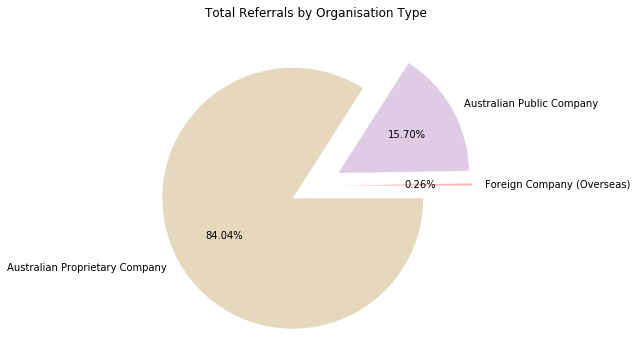

In [120]:
fig_app, ax_app = plt.subplots(figsize=(10, 6))
theme = plt.get_cmap('Pastel1')
ax_app.set_prop_cycle("color", [theme(1. * i / len(holder_counts))
                             for i in range(len(holder_counts))])
plt.pie(holder_counts, labels=holder_labels, autopct='%1.2f%%', explode=[.2,.2,.2])
plt.title('Total Referrals by Organisation Type')

plt.savefig(base_dir + '/example_figure.pdf', format='pdf')

# fig_ASIC, ax_ASIC = plt.subplots(figsize=(6, 6))
# theme = plt.get_cmap('Pastel1')
# ax_ASIC.set_prop_cycle("color", [theme(1. * i / len(totals))
#                              for i in range(len(totals))])
# ax_pie.set_prop_cycle("color", [theme(1. * i / len(totals))
#                              for i in range(len(types))])
# plt.pie(totals, labels=types, autopct='%1.2f%%', explode=[.2]*len(types))

In [10]:
import urllib
import json
url = 'https://data.gov.au/data/api/3/action/datastore_search?resource_id=eb1e6be4-5b13-4feb-b28e-388bf7c26f93&limit=200000'  
fileobj = urllib.request.urlopen(url)
ACNC_register = pd.DataFrame(json.loads(fileobj.read())['result']['records'])

In [12]:
ACNC_register.to_csv(base_dir + 'test.csv')

In [16]:
url = 'https://data.gov.au/data/api/3/action/datastore_search?resource_id=cb7e4eb5-ed46-4c6c-97a0-4532f4479b7d&limit=1000000'
fileobj = urllib.request.urlopen(url)
ASIC_register = pd.DataFrame(json.loads(fileobj.read())['result']['records'])

HTTPError: HTTP Error 502: Bad Gateway

In [ ]:
ASIC_register